# Hassan Shah

# Image Classification using CNN

## Imports

In [1]:
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

1.	Write code to train a CNN model which classifies the CIFAR100 dataset. Load the dataset from keras - https://keras.io/api/datasets/cifar100/ There are coarse and fine labels. Load the fine labeled dataset. Images are 32x32 pixels. Three color channels. 

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

2.	Partition the dataset into train and test sets. Print the shapes of the train and test data sets. (screenshot)


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

3.	Visualize the first 30 images from the train dataset (screenshot)

In [7]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
               'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
               'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 
               'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 
               'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 
               'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 
               'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 
               'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 
               'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

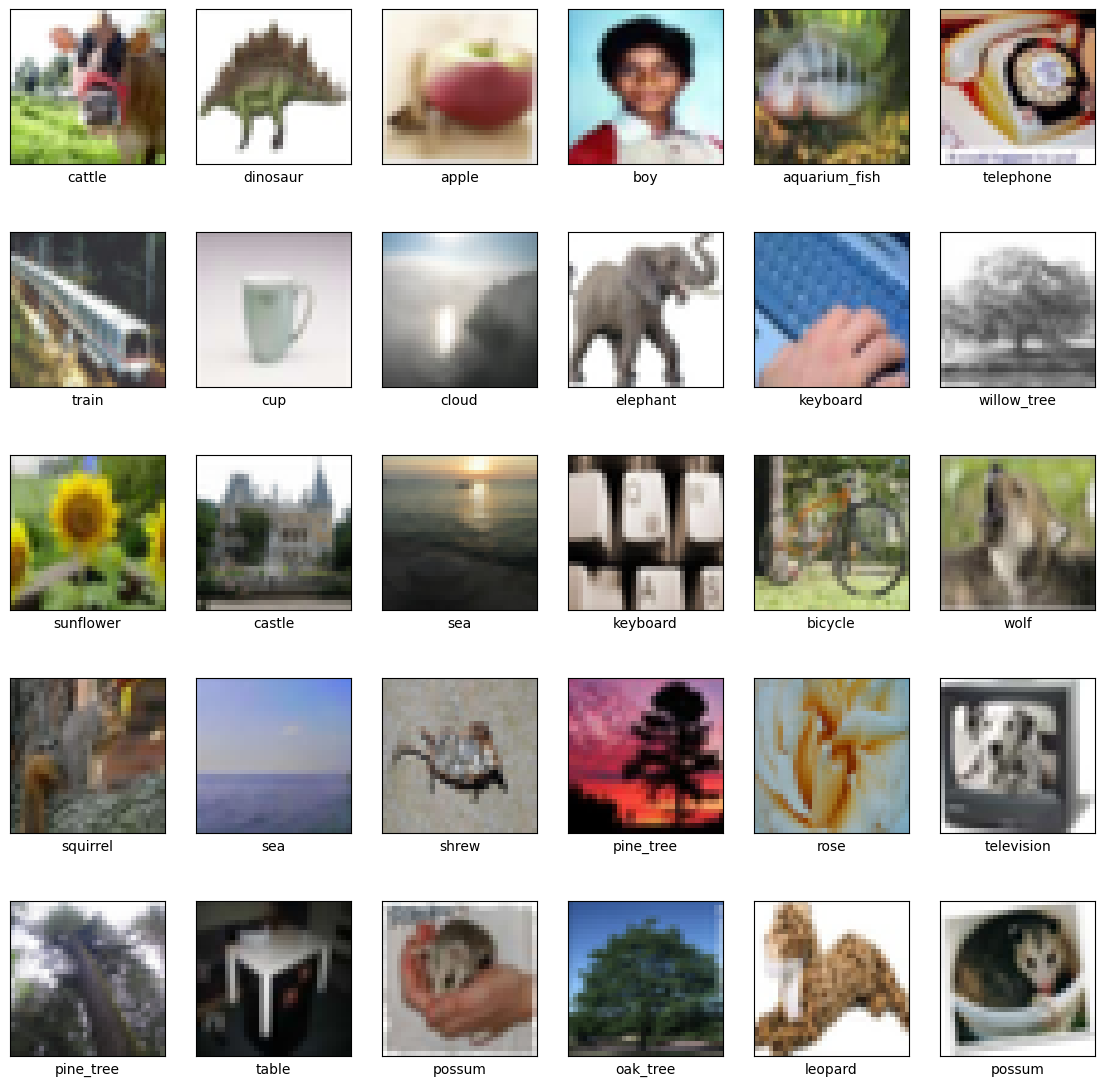

In [8]:
plt.figure(figsize=[14,14])
for i in range(30):
  plt.subplot(5, 6, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i,0]])
plt.show()

4.	Scale the pixel values

In [9]:
X_train = X_train/255
X_test = X_test/255

5.	One-hot encode the classes to use the categorical cross-entropy loss function

In [10]:
n_classes = len(class_names)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

6.	Build a CNN sequence of layers. Must contain the following layers. Hyper parameters are up to you.  
a.	At least 1 convolutional layer  
b.	At least 1 dropout layer  
c.	At least 1 maxpool layer  
d.	At least 1 flatten layer  
e.	At least 1 dense layer  


In [11]:
model = Sequential([
    Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same',
           activation='relu', input_shape=(32, 32, 3)),
    Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same',
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(100, kernel_size=(3, 3), strides=(1, 1), padding='same',
           activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(500, activation='relu'),
    Dropout(0.4),
    Dense(250, activation='relu'),
    Dropout(0.3),
    Dense(100, activation='softmax')
])

7.	Use the loss function categorical_crossentropy when compiling the model

In [12]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer = 'Adam')

8.	Train the model with at least 10 epochs

In [13]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 14s 5ms/step - loss: 4.1295 - accuracy: 0.0617 - val_loss: 3.6643 - val_accuracy: 0.1460
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 3.5390 - accuracy: 0.1532 - val_loss: 3.1907 - val_accuracy: 0.2241
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 3.2123 - accuracy: 0.2124 - val_loss: 2.9262 - val_accuracy: 0.2782
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 3.0014 - accuracy: 0.2551 - val_loss: 2.7619 - val_accuracy: 0.3039
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.8305 - accuracy: 0.2859 - val_loss: 2.6609 - val_accuracy: 0.3316
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.7115 - accuracy: 0.3056 - val_loss: 2.6005 - val_accuracy: 0.3426
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6136 - accuracy: 0.3252 - val_loss: 2.4750 - val_accuracy

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 100)       67600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 100)        0         
 2D)                                                    

9.	Plot the loss and accuracy curves for both train and validation sets.

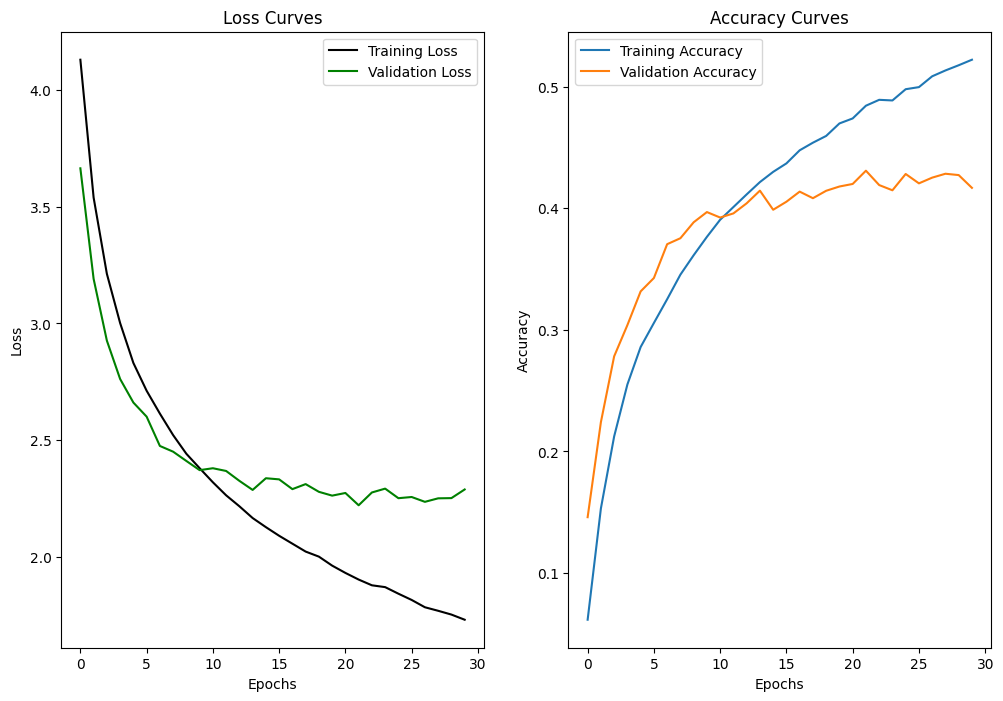

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'black', label='Training Loss')
plt.plot(history.history['val_loss'], 'green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()

10.	Visualize the predicted and actual image labels for the first 30 images in the dataset.

In [16]:
pred = model.predict(X_test[:30]) 
pred_classes = np.argmax(pred, axis=1) 

1/1 [==============================] - 0s 175ms/step


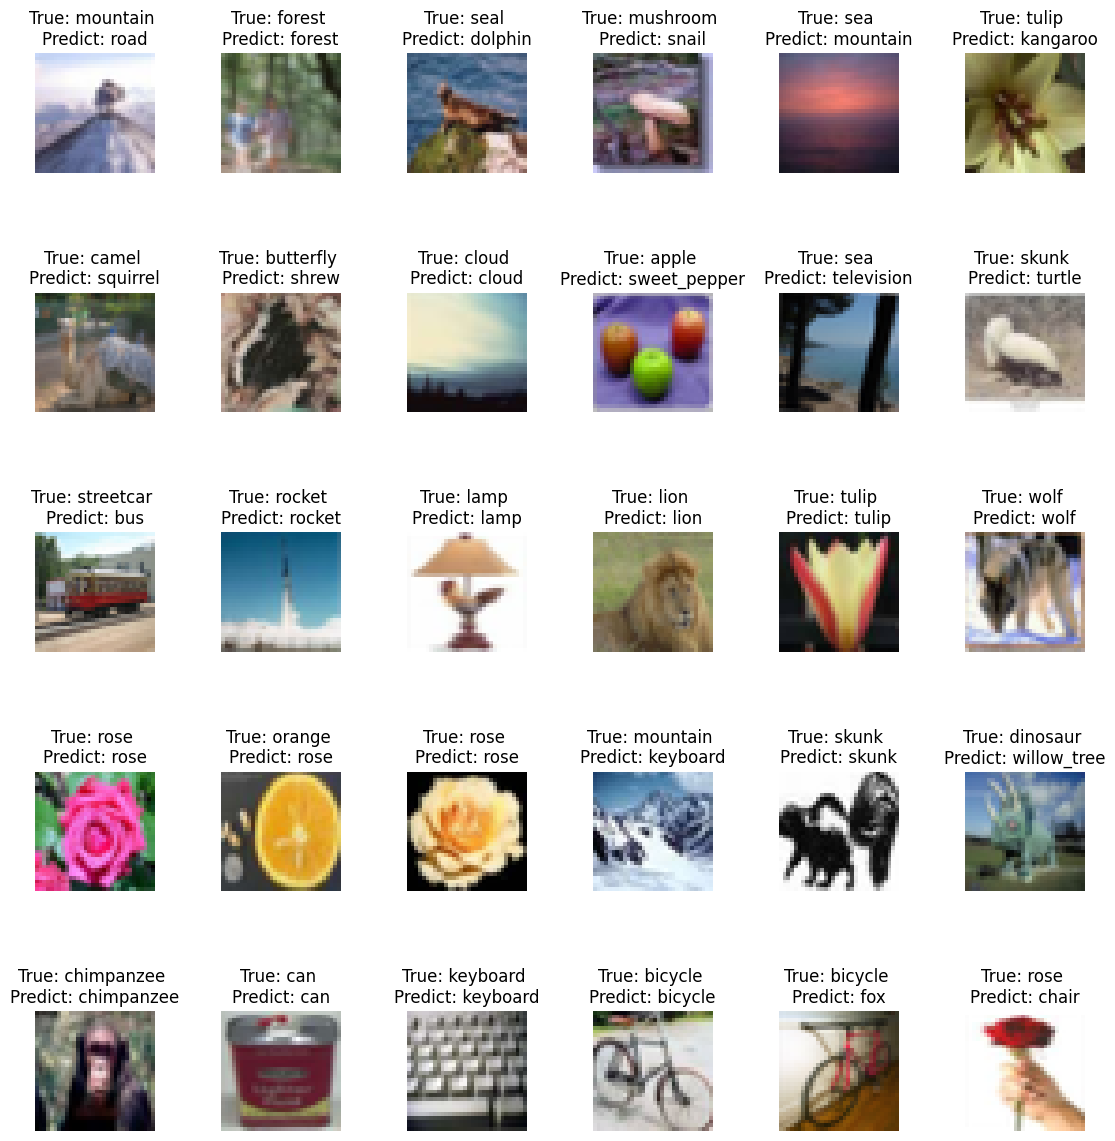

In [17]:
y_true = np.argmax(y_test[:30], axis=1)

plt.figure(figsize=[14, 14])
for i in range(30):
    ax = plt.subplot(5, 6, i + 1)
    ax.imshow(X_test[i])
    ax.set_title("True: %s \nPredict: %s" % (class_names[int(y_true[i])], class_names[int(pred_classes[i])]))
    ax.axis('off')
plt.subplots_adjust(hspace=1)
plt.show()

11.	Visualize 30 random misclassified images. 

In [18]:
y_pred = model.predict(X_test)
pred_classes_all = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


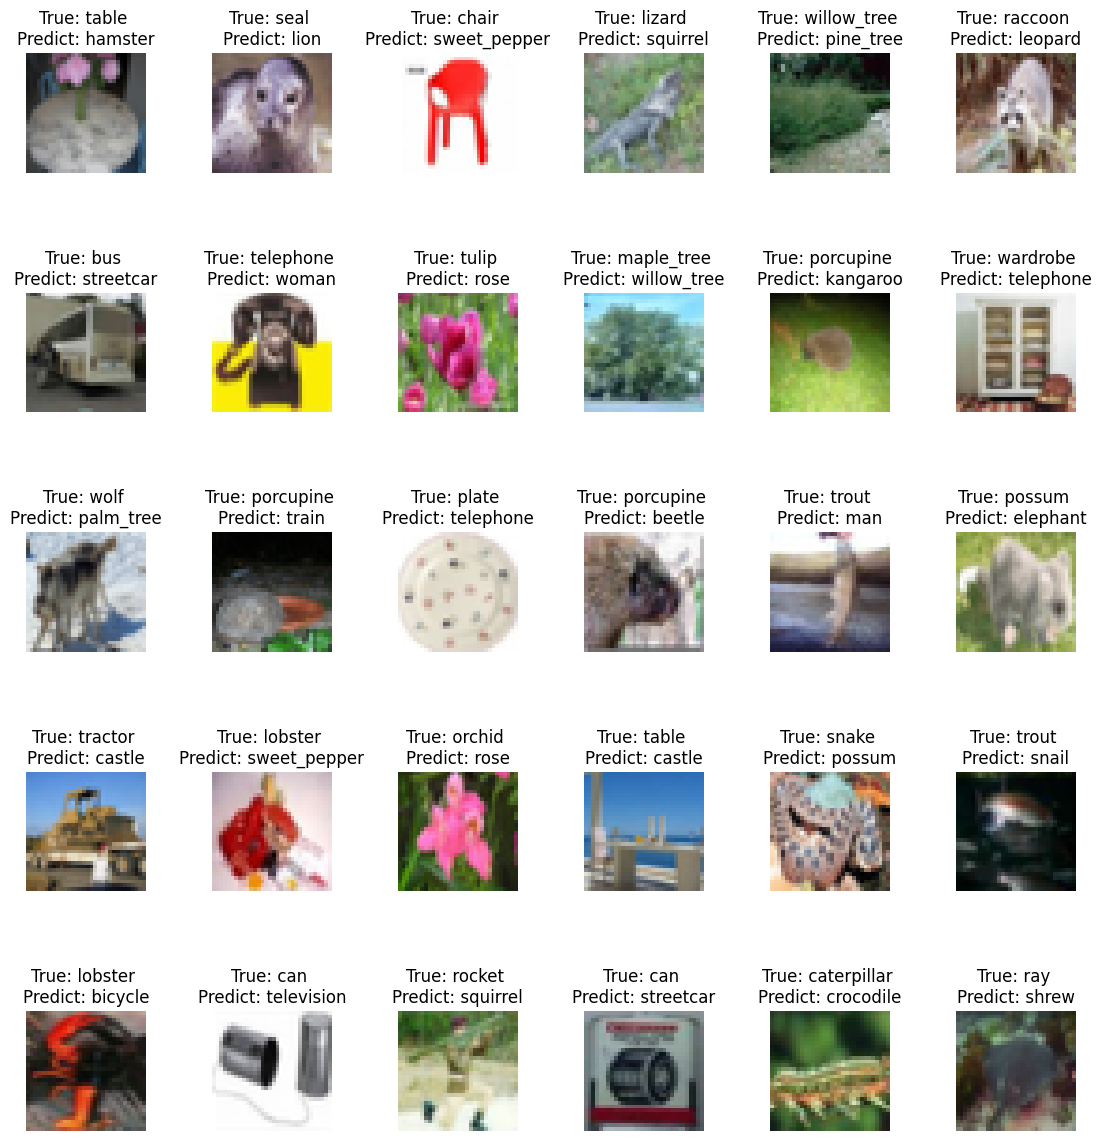

In [19]:
y_test_classes_all = np.argmax(y_test, axis=1)
misclassified_indices_all = np.where(pred_classes_all != y_test_classes_all)[0]

np.random.seed(2023)
random_indices_all = np.random.choice(misclassified_indices_all, 30, replace=False)

plt.figure(figsize=[14, 14])
for i, index in enumerate(random_indices_all):
    ax = plt.subplot(5, 6, i + 1)
    ax.imshow(X_test[index])
    ax.set_title("True: %s \nPredict: %s" % (class_names[y_test_classes_all[index]], class_names[pred_classes_all[index]]))
    ax.axis('off')
plt.subplots_adjust(hspace=1)
plt.show()